**Testing for pairwise_colocalisation**

# Sandbox for random spots colocalization testing

We want to compute random colocalization rates between populations with equal number of spot and equal volume.

Real spot population is bound by the cell in 3D, also, for some population they can be bound in or out the nucleus. Which is why we can't generate a random population in the bounding box of the cell and test it with the real population.

What we can try is to generate 2 random populations and test them together.
We can generate the populations in a rectangle of same area than the cell's area by computing the average number of spots/plane(1st approximation)
To account for 3D colocalization we can generate 3 planes and measure the colocalization  of the one in the middle. (3 be cause colocalization cannot happen further than 1 plane away)

**Steps :**
* compute for each cell and each population the average number of spot/plane (in the center of the cell) (**tends to increase concentration**)
* For each cell get area --> Compute size of a rectangle of same area
* Compute 3 random spots distributions in this area and assign z coordinates 0, 1, 2
* compute colocalization rate for z = 1
* plot distribution on all cells

## Load a spot table

In [ ]:
import pandas as pd
import numpy as np
from Sequential_Fish.tools import safe_merge_no_duplicates

RUN_PATH = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-09-03 - SeqFISH_Run8 - HeLa_POLR2"
Acquisition = pd.read_feather(RUN_PATH + "/result_tables/Acquisition.feather")
Detection = pd.read_feather(RUN_PATH + "/result_tables/Detection.feather")
Spots = pd.read_feather(RUN_PATH + "/result_tables/Spots.feather")
Gene_map = pd.read_feather(RUN_PATH + "/result_tables/Gene_map.feather")
Cell = pd.read_feather(RUN_PATH + "/result_tables/Cell.feather")


In [ ]:
Detection = safe_merge_no_duplicates(
    Detection,
    Acquisition,
    on= ['acquisition_id'],
    keys=['cycle','location', 'fish_reodered_shape']
)

Detection = safe_merge_no_duplicates(
    Detection,
    Gene_map,
    on= ['cycle','color_id'],
    keys=['target']
)

Spots =safe_merge_no_duplicates(
    Spots,
    Detection,
    on= 'detection_id',
    keys= ['location','target', 'voxel_size', 'fish_reodered_shape']
)


Spots

/home/floric/miniconda3/envs/dev/lib/python3.8/site-packages/Sequential_Fish/tools/utils.py:154: UserWarning: location already in left dataframe columns, location was removed from columns to merge.
  warnings.warn(f"{key} already in left dataframe columns, {key} was removed from columns to merge.")


,spot_id,cluster_id,drifted_z,drifted_y,drifted_x,intensity,population,detection_id,acquisition_id,drift_z,...,cycle,color_id,is_washout,coordinates,in_nucleus,cell_label,location,target,voxel_size,fish_reodered_shape
0,0,NaN,5,0,597,5927,free,1,0,0,...,0,0,False,"[5, 0, 597]",True,2.0,Location-01,POLR2A,"[200, 97, 97]","[51, 2004, 2004, 2]"
1,1,NaN,5,77,389,6095,free,1,0,0,...,0,0,False,"[5, 77, 389]",False,1.0,Location-01,POLR2A,"[200, 97, 97]","[51, 2004, 2004, 2]"
2,2,NaN,5,141,993,6923,free,1,0,0,...,0,0,False,"[5, 141, 993]",False,5.0,Location-01,POLR2A,"[200, 97, 97]","[51, 2004, 2004, 2]"
3,3,NaN,5,144,1107,6960,free,1,0,0,...,0,0,False,"[5, 144, 1107]",True,5.0,Location-01,POLR2A,"[200, 97, 97]","[51, 2004, 2004, 2]"
4,4,NaN,5,265,673,7111,free,1,0,0,...,0,0,False,"[5, 265, 673]",True,6.0,Location-01,POLR2A,"[200, 97, 97]","[51, 2004, 2004, 2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338989,288079,NaN,11,812,174,8032,free,174,58,0,...,5,0,True,"[11, 812, 174]",True,16.0,Location-09,Washout_5_0,"[200, 97, 97]","[56, 2004, 2004, 2]"
338990,288080,0.0,5,1218,755,17217,clustered,174,58,0,...,5,0,True,"[5, 1218, 755]",True,28.0,Location-09,Washout_5_0,"[200, 97, 97]","[56, 2004, 2004, 2]"
338991,288081,0.0,5,1217,757,16242,clustered,174,58,0,...,5,0,True,"[5, 1217, 757]",True,28.0,Location-09,Washout_5_0,"[200, 97, 97]","[56, 2004, 2004, 2]"
338992,288082,0.0,5,1217,755,16993,clustered,174,58,0,...,5,0,True,"[5, 1217, 755]",True,28.0,Location-09,Washout_5_0,"[200, 97, 97]","[56, 2004, 2004, 2]"


### Filtering spots

In [ ]:
from Sequential_Fish.analysis.post_processing import RNA_filtering, Spots_filtering

Spots = RNA_filtering(Spots)
Spots = Spots_filtering(Spots, Cell=Cell)
Spots = Spots.loc[~Spots['target'].str.contains('Washout')]
Spots = Spots.loc[~Spots['target'].str.contains('Washout')]
Spots

,spot_id,cluster_id,drifted_z,drifted_y,drifted_x,intensity,population,detection_id,acquisition_id_x,drift_z,...,nucleus_mip_min_signal,nucleus_mip_median_signal,nucleus_mean_mean_signal,nucleus_mean_max_signal,nucleus_mean_min_signal,nucleus_mean_median_signal,acquisition_id_y,cluster_number,rna_number,cell_id
0,2,NaN,5,141,993,6923,free,1,0,0,...,2869,5519.0,4609.652813,5953,2472,4664.5,0,8,158,0
1,3,NaN,5,144,1107,6960,free,1,0,0,...,2869,5519.0,4609.652813,5953,2472,4664.5,0,8,158,0
2,78,NaN,7,166,1097,6533,free,1,0,0,...,2869,5519.0,4609.652813,5953,2472,4664.5,0,8,158,0
3,115,NaN,9,148,1035,7139,free,1,0,0,...,2869,5519.0,4609.652813,5953,2472,4664.5,0,8,158,0
4,211,NaN,14,78,1076,6400,free,1,0,0,...,2869,5519.0,4609.652813,5953,2472,4664.5,0,8,158,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268373,338723,NaN,35,946,145,4862,free,208,189,0,...,3480,5905.0,4797.449686,6468,2860,4851.5,189,0,14,299
268374,338724,NaN,33,947,144,4859,free,208,189,0,...,3480,5905.0,4797.449686,6468,2860,4851.5,189,0,14,299
268375,338725,NaN,34,973,276,4243,free,208,189,0,...,3480,5905.0,4797.449686,6468,2860,4851.5,189,0,14,299
268376,338770,NaN,34,988,128,4261,free,208,189,0,...,3480,5905.0,4797.449686,6468,2860,4851.5,189,0,14,299


## Group spots and get number of spots per plane

In [ ]:
grouped_spots = Spots.groupby(['location','cell_label','detection_id','target','z'], as_index=False).agg({
    'spot_id' : 'count',
})

grouped_spots = grouped_spots.rename(columns={"spot_id" : 'spot_count'})
grouped_spots


,location,cell_label,detection_id,target,z,spot_count
0,Location-01,5.0,1,POLR2A,5,3
1,Location-01,5.0,1,POLR2A,7,2
2,Location-01,5.0,1,POLR2A,9,3
3,Location-01,5.0,1,POLR2A,10,3
4,Location-01,5.0,1,POLR2A,11,3
...,...,...,...,...,...,...
80932,Location-10,40.0,208,POLR2L,35,2
80933,Location-10,40.0,208,POLR2L,37,2
80934,Location-10,40.0,208,POLR2L,38,1
80935,Location-10,40.0,208,POLR2L,39,2


In [ ]:
check_len = len(grouped_spots)

if 'cell_area' not in grouped_spots.columns :
    grouped_spots = pd.merge(
        grouped_spots,
        Cell.loc[:,['location','label', 'detection_id','cell_area']],
        left_on=['location','cell_label', 'detection_id'],
        right_on=['location','label', 'detection_id'],
    )

assert len(grouped_spots) == check_len, f"len {len(grouped_spots)} : check : {check_len}"
grouped_spots

,location,cell_label,detection_id,target,z,spot_count,label,cell_area
0,Location-01,5.0,1,POLR2A,5,3,5,56440.0
1,Location-01,5.0,1,POLR2A,7,2,5,56440.0
2,Location-01,5.0,1,POLR2A,9,3,5,56440.0
3,Location-01,5.0,1,POLR2A,10,3,5,56440.0
4,Location-01,5.0,1,POLR2A,11,3,5,56440.0
...,...,...,...,...,...,...,...,...
80932,Location-10,40.0,208,POLR2L,35,2,40,46475.0
80933,Location-10,40.0,208,POLR2L,37,2,40,46475.0
80934,Location-10,40.0,208,POLR2L,38,1,40,46475.0
80935,Location-10,40.0,208,POLR2L,39,2,40,46475.0


In [ ]:
BOTTOM = 5
PLANE_NUMBER = 20

total_per_plane = grouped_spots[(grouped_spots['z'] >= BOTTOM) & (grouped_spots['z'] < BOTTOM + PLANE_NUMBER)].groupby(['location','cell_label','detection_id','target'])['spot_count'].sum()
average_per_plane = (total_per_plane/PLANE_NUMBER).rename('spot_per_plane').reset_index(drop=False)


single_per_plane = average_per_plane.groupby(['target'])['spot_per_plane'].mean()
single_per_plane

target
POLR2A    4.039590
POLR2B    1.907886
POLR2C    1.893060
POLR2E    2.632965
POLR2F    2.395426
POLR2H    1.013133
POLR2I    0.949051
POLR2J    1.555836
POLR2K    0.430420
POLR2L    0.933121
Name: spot_per_plane, dtype: float64

In [ ]:
def get_squared_shape(area, dim=2) :
    c = np.float_power(area, 1/dim)
    
    c = int(np.round(c))
    return (c,)*dim

dim = 2
area =25000
get_squared_shape(area, dim=dim)

(158, 158)

In [ ]:
def create_planes_with_random_distribution(
    spot_number : int, 
    area : int, 
    colocalization_distance : int, 
    voxel_size : tuple,  
    random_generator : np.random.Generator = None,
    ) :
    
    z_range = int(np.floor(colocalization_distance/voxel_size[0]))
    n_layers = 2*z_range + 1
    shape = get_squared_shape(area)
    
    if random_generator is None :
        random_generator = np.random.default_rng()
    
    random_spots = random_generator.integers(
        low=[0,0],
        high=shape,
        size=(spot_number * n_layers, 2)
    )
    
    
    z_coords = np.arange(n_layers * spot_number)
    z_coords = z_coords.reshape(n_layers*spot_number,1) % n_layers
    
    random_spots_array =  np.concatenate([z_coords, random_spots], axis=1)
    random_spots_array *= voxel_size
    
    return random_spots_array

In [ ]:
array = create_planes_with_random_distribution(
    spot_number=10,
    colocalization_distance=400,
    area=10000,
    voxel_size=(200,97,97)
)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm

def create_NearestNeighbors_models(spots : np.ndarray, colocalization_distance : int,) :
   return NearestNeighbors(n_neighbors=1, radius=colocalization_distance).fit(spots)

In [ ]:
model = create_NearestNeighbors_models(array, colocalization_distance=400)

In [ ]:
def compute_colocalization_rate(test_number : int, area : int, model : NearestNeighbors, colocalization_distance, voxel_size) :
    z_range = int(np.floor(colocalization_distance/voxel_size[0]))
    shape = get_squared_shape(area)
    
    z = np.floor(z_range/2) #midle stack
    
    random_generator = np.random.default_rng()
    spots = random_generator.integers(
        low=[z,0,0],
        high=(z+1,) + shape,
        size=(test_number,3)
    )
    
    spots *=voxel_size
    
    distances, indices = model.kneighbors(spots)
    
    success_rate = (distances <= colocalization_distance).sum()
    success_rate /= test_number
    
    return success_rate
    

In [ ]:
compute_colocalization_rate(
    test_number=10,
    area=10000,
    model=model,
    colocalization_distance=400,
    voxel_size=(200,97,97)
)

0.2

In [ ]:
def run_random_coloc_simulation(
    area : int,
    spot_number_per_plane : int,
    n_test : int,
    voxel_size : tuple,
    colocalization_distance : int
) :
    
    random_spots_array = create_planes_with_random_distribution(
        spot_number=spot_number_per_plane,
        area=area,
        colocalization_distance=colocalization_distance,
        voxel_size=voxel_size,
    )
    model = create_NearestNeighbors_models(random_spots_array, colocalization_distance=400)
    
    colocalization_rate = compute_colocalization_rate(
        test_number=n_test,
        area=area,
        model=model,
        colocalization_distance=colocalization_distance,
        voxel_size=voxel_size
    )
    
    res = (
        area,
        spot_number_per_plane,
        colocalization_rate
    )
    
    return res

In [ ]:
spot_number_per_plane = 4
n_test = 10000
voxel_size = (200,97,97)
colocalization_distance = 400

pixel_area = voxel_size[1] * voxel_size[2]
min_area = 10000
max_area = 140000
points_number = 100

data = []

for area in tqdm(np.linspace(min_area, max_area, points_number)) :
    for spot_number_per_plane in range(2, 10) :
        
        data_point = run_random_coloc_simulation(
            area=area,
            spot_number_per_plane=spot_number_per_plane,
            n_test=n_test,
            voxel_size=voxel_size,
            colocalization_distance=colocalization_distance
        )
        
        data.append(data_point)

100%|██████████| 100/100 [00:01<00:00, 55.23it/s]


In [ ]:
dataframe = pd.DataFrame(columns= ['area','spot_number', 'colocalization_rate'], data=data)
dataframe

,area,spot_number,colocalization_rate
0,10000.0,2,0.0241
1,10000.0,3,0.0387
2,10000.0,4,0.0510
3,10000.0,5,0.0650
4,10000.0,6,0.0736
...,...,...,...
795,140000.0,5,0.0057
796,140000.0,6,0.0059
797,140000.0,7,0.0071
798,140000.0,8,0.0067


In [ ]:
# save point
import os
save_path = "/home/floric/Documents/python_dev/colocalization_simulation"
os.makedirs(save_path, exist_ok=True)
filename = save_path + f"/data_area{max_area}.feather"
count = 0
while True :
    count +=1
    if os.path.isfile(filename) : 
        _break = False
        filename = filename.replace(str(max_area), f"{max_area}_{count}")
    else :
        dataframe.reset_index(drop=False).to_feather(filename)
        
        _break = True
    
    if _break : break
    
print(filename)


/home/floric/Documents/python_dev/colocalization_simulation/data_area140000_4_3_2_1.feather


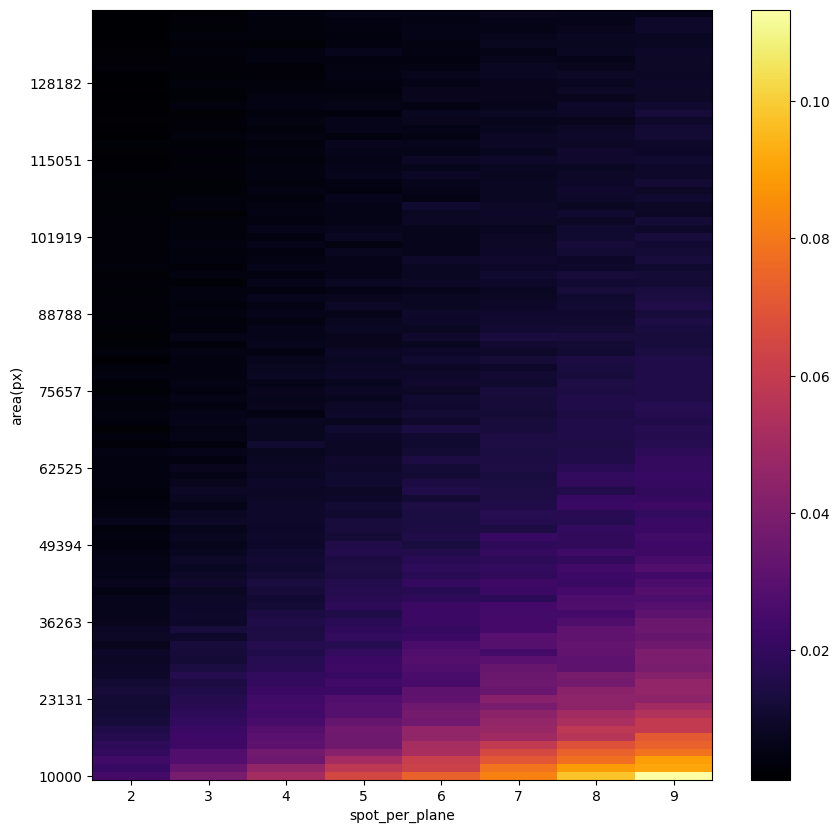

In [ ]:
import matplotlib.pyplot as plt

def create_colormap_plot(df : pd.DataFrame, x_key :str, y_key : str, value_col : str) :
    df['area'] = df['area'].round().astype(int)
    df = df.pivot(columns=x_key, index=y_key,  values=value_col)
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    
    
    
    mesh = ax.pcolormesh(df, cmap='inferno')
    color_bar = plt.colorbar(mesh, ax=ax)
    
    step = int(len(df) / 10)
    
    ax.set_yticks(
        np.arange(len(df))[0:len(df):step] + 0.5,
        df.index[0:len(df):step]
        )
    ax.set_ylabel('area(px)')
    
    ax.set_xticks(
        np.arange(len(df.columns)) + 0.5,
        df.columns
        )
    ax.set_xlabel('spot_per_plane')
    
    
    return fig
    
fig = create_colormap_plot(dataframe, 'spot_number', 'area', 'colocalization_rate')
folder = "/home/floric/Documents/python_dev/colocalization_simulation"
fig.savefig(folder + "/heatmap_colocalization_rate.svg")

In [ ]:
from sklearn.linear_model import LinearRegression


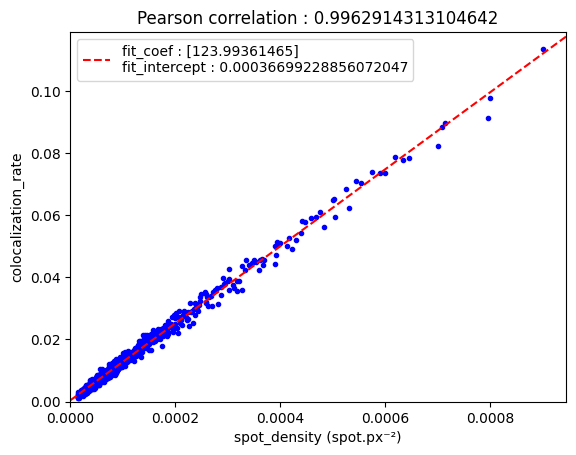

In [ ]:
dataframe['spot_density'] = dataframe['spot_number'] / dataframe['area']
dataframe = dataframe.sort_values('spot_density')
correlation_coefficient = dataframe['colocalization_rate'].corr(dataframe['spot_density'])

linear_fit = LinearRegression().fit(dataframe['spot_density'].to_numpy().reshape(-1,1), dataframe['colocalization_rate'])

fit_coef = linear_fit.coef_
fit_intercept = linear_fit.intercept_

fig = plt.figure()
ax = fig.gca()

ax.plot(dataframe['spot_density'], dataframe['colocalization_rate'], '.b')


ax.set_xlabel('spot_density (spot.px⁻²)')
ax.set_ylabel('colocalization_rate')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_title(f"Pearson correlation : {correlation_coefficient}")

xmin,xmax,ymin,ymax = plt.axis()

ax.plot([xmin, xmax], [xmin* fit_coef + fit_intercept, xmax*fit_coef + fit_intercept], '--r', label = f"fit_coef : {fit_coef}\nfit_intercept : {fit_intercept}")
ax.legend()
fig.savefig(folder + "/correlation_colocalization_rate_vs_spot_density.svg")


This should tell us the probability that 1 molecule randomly co-localize with a distribution of molecule of density X
Now if we want to know what proportion of a poulation we can expect to randomly co-localize with a distribution of molecule of density X we should use this law and draw a binomial probability

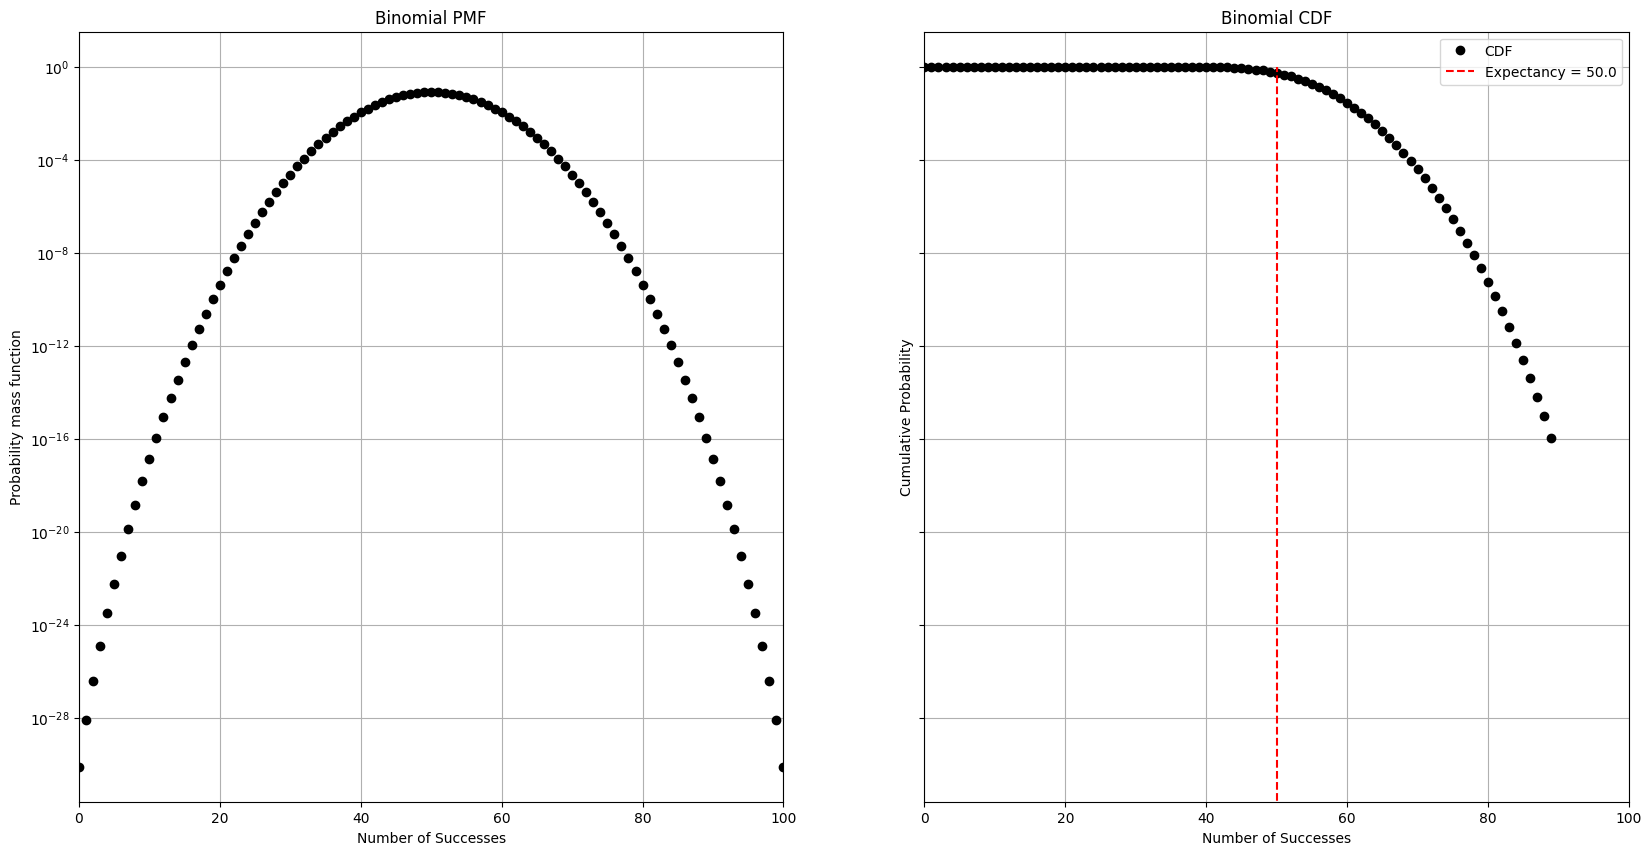

In [ ]:
from scipy.stats import binom
import numpy as np

p = 0.5
population_size = 100
expectancy = p * population_size
x = np.arange(population_size +1 )

cdf = binom.cdf(x -1,population_size, p)
pmf = binom.pmf(x,population_size, p)

fig = plt.figure(figsize=(20,10))
left,right = fig.subplots(1,2, sharey=True)

plt.subplot(1,2,1)
plt.plot(x, pmf, 'ok', label='CDF')
plt.xlabel('Number of Successes')
plt.ylabel('Probability mass function')
plt.title('Binomial PMF')

# Plot CDF
plt.subplot(1,2,2)
plt.plot(x, 1-cdf, 'ok', label='CDF')
plt.plot([expectancy,expectancy], [0,1], '--r', label=f'Expectancy = {expectancy}')
plt.xlabel('Number of Successes')
plt.ylabel('Cumulative Probability')
plt.title('Binomial CDF')

right.legend()

# left.set_ylim(0,1)
left.set_xlim(0, population_size)
right.set_xlim(0, population_size)
left.grid(True)
right.grid(True)
left.set_yscale('log')

fig.savefig(folder + "/bionmial_law_p_10")

# Load data

In [631]:
import pandas as pd
from Sequential_Fish.tools import safe_merge_no_duplicates
from Sequential_Fish.analysis.post_processing import RNA_filtering, Spots_filtering

# RUN_PATH = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-09-03 - SeqFISH_Run8 - HeLa_POLR2"
RUN_PATH = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-10-02 - SeqFISH_Run9 - HeLa _POLR2"
# RUN_PATH = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-10-09 - SeqFISH_Run10 - HeLa-Puro_POLR2" 


In [632]:
Acquisition = pd.read_feather(RUN_PATH + "/result_tables/Acquisition.feather")
Detection = pd.read_feather(RUN_PATH + "/result_tables/Detection.feather")
Spots = pd.read_feather(RUN_PATH + "/result_tables/Spots.feather")
Gene_map = pd.read_feather(RUN_PATH + "/result_tables/Gene_map.feather")
Cell = pd.read_feather(RUN_PATH + "/result_tables/Cell.feather")

COLOCALISATION_DISTANCE = 400


In [633]:
Detection = safe_merge_no_duplicates(
    Detection,
    Acquisition,
    on= ['acquisition_id'],
    keys=['cycle','location', 'fish_reodered_shape']
)

Detection = safe_merge_no_duplicates(
    Detection,
    Gene_map,
    on= ['cycle','color_id'],
    keys=['target']
)

Spots =safe_merge_no_duplicates(
    Spots,
    Detection,
    on= 'detection_id',
    keys= ['location','target', 'voxel_size', 'fish_reodered_shape']
)


Spots

/home/floric/miniconda3/envs/dev/lib/python3.8/site-packages/Sequential_Fish/tools/utils.py:154: UserWarning: location already in left dataframe columns, location was removed from columns to merge.
  warnings.warn(f"{key} already in left dataframe columns, {key} was removed from columns to merge.")


,spot_id,cluster_id,drifted_z,drifted_y,drifted_x,intensity,population,detection_id,acquisition_id,drift_z,...,cycle,color_id,is_washout,coordinates,in_nucleus,cell_label,location,target,voxel_size,fish_reodered_shape
0,0,NaN,5,0,9,3413,free,1,0,0,...,0,0,False,"[5, 0, 9]",False,0.0,Location-01,POLR2B,"[200, 97, 97]","[51, 2004, 2004, 2]"
1,1,NaN,5,5,1047,6016,free,1,0,0,...,0,0,False,"[5, 5, 1047]",False,0.0,Location-01,POLR2B,"[200, 97, 97]","[51, 2004, 2004, 2]"
2,2,NaN,5,6,1510,6100,free,1,0,0,...,0,0,False,"[5, 6, 1510]",False,1.0,Location-01,POLR2B,"[200, 97, 97]","[51, 2004, 2004, 2]"
3,3,NaN,5,7,1103,4900,free,1,0,0,...,0,0,False,"[5, 7, 1103]",False,0.0,Location-01,POLR2B,"[200, 97, 97]","[51, 2004, 2004, 2]"
4,4,NaN,5,8,1518,7365,free,1,0,0,...,0,0,False,"[5, 8, 1518]",True,1.0,Location-01,POLR2B,"[200, 97, 97]","[51, 2004, 2004, 2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609904,334074,NaN,28,63,952,4162,free,126,155,0,...,15,0,False,"[28, 71, 953]",False,0.0,Location-06,Washout_15_0,"[200, 97, 97]","[56, 2004, 2004, 2]"
609905,334075,NaN,35,1709,257,3828,free,126,155,0,...,15,0,False,"[35, 1717, 258]",False,0.0,Location-06,Washout_15_0,"[200, 97, 97]","[56, 2004, 2004, 2]"
609906,334076,NaN,33,1709,257,4012,free,126,155,0,...,15,0,False,"[33, 1717, 258]",False,0.0,Location-06,Washout_15_0,"[200, 97, 97]","[56, 2004, 2004, 2]"
609907,334077,NaN,36,1709,257,3978,free,126,155,0,...,15,0,False,"[36, 1717, 258]",False,0.0,Location-06,Washout_15_0,"[200, 97, 97]","[56, 2004, 2004, 2]"


In [634]:
Spots = RNA_filtering(Spots)
Spots = Spots_filtering(Spots, Detection=Detection, Cell=Cell)
Spots = Spots.loc[~Spots['target'].str.contains('Washout')]
Spots = Spots.loc[Spots['target'] != 'POLR2A_20']
Spots

,spot_id,cluster_id,drifted_z,drifted_y,drifted_x,intensity,population,detection_id,acquisition_id_x,drift_z,...,nucleus_mip_min_signal,nucleus_mip_median_signal,nucleus_mean_mean_signal,nucleus_mean_max_signal,nucleus_mean_min_signal,nucleus_mean_median_signal,acquisition_id_y,cluster_number,rna_number,cell_id
0,11,NaN,5,51,448,10076,free,1,0,0,...,2284,5020.0,4041.503581,5950,2040,4147.0,0,3,102,2
1,13,NaN,5,59,487,7859,free,1,0,0,...,2284,5020.0,4041.503581,5950,2040,4147.0,0,3,102,2
2,14,NaN,5,66,453,5208,free,1,0,0,...,2284,5020.0,4041.503581,5950,2040,4147.0,0,3,102,2
3,15,NaN,5,68,487,6124,free,1,0,0,...,2284,5020.0,4041.503581,5950,2040,4147.0,0,3,102,2
4,16,NaN,5,70,460,5512,free,1,0,0,...,2284,5020.0,4041.503581,5950,2040,4147.0,0,3,102,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333308,604847,NaN,48,785,93,4877,free,217,189,0,...,1681,3605.0,2947.183973,4380,1526,2974.0,189,2,81,338
333309,604848,NaN,48,786,94,4600,free,217,189,0,...,1681,3605.0,2947.183973,4380,1526,2974.0,189,2,81,338
333310,605106,NaN,48,912,164,4063,free,217,189,0,...,1681,3605.0,2947.183973,4380,1526,2974.0,189,2,81,338
333311,605107,NaN,46,913,164,3683,free,217,189,0,...,1681,3605.0,2947.183973,4380,1526,2974.0,189,2,81,338


## Rename

In [635]:
rule = {
    'POLR2A_0' : 'POLR2A',
    'POLR2B_0' : 'POLR2B',
}
Spots['target'] = Spots['target'].replace(rule)

# NearestNeighbours

In [636]:
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm #loading bar
import numpy as np

#We test colocalisation of population 1 with population 2, ie population 2 is used to fit neighbours model
POPULATION_1 = 'all'
POPULATION_2 = 'all'

In [637]:
Spots

,spot_id,cluster_id,drifted_z,drifted_y,drifted_x,intensity,population,detection_id,acquisition_id_x,drift_z,...,nucleus_mip_min_signal,nucleus_mip_median_signal,nucleus_mean_mean_signal,nucleus_mean_max_signal,nucleus_mean_min_signal,nucleus_mean_median_signal,acquisition_id_y,cluster_number,rna_number,cell_id
0,11,NaN,5,51,448,10076,free,1,0,0,...,2284,5020.0,4041.503581,5950,2040,4147.0,0,3,102,2
1,13,NaN,5,59,487,7859,free,1,0,0,...,2284,5020.0,4041.503581,5950,2040,4147.0,0,3,102,2
2,14,NaN,5,66,453,5208,free,1,0,0,...,2284,5020.0,4041.503581,5950,2040,4147.0,0,3,102,2
3,15,NaN,5,68,487,6124,free,1,0,0,...,2284,5020.0,4041.503581,5950,2040,4147.0,0,3,102,2
4,16,NaN,5,70,460,5512,free,1,0,0,...,2284,5020.0,4041.503581,5950,2040,4147.0,0,3,102,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333308,604847,NaN,48,785,93,4877,free,217,189,0,...,1681,3605.0,2947.183973,4380,1526,2974.0,189,2,81,338
333309,604848,NaN,48,786,94,4600,free,217,189,0,...,1681,3605.0,2947.183973,4380,1526,2974.0,189,2,81,338
333310,605106,NaN,48,912,164,4063,free,217,189,0,...,1681,3605.0,2947.183973,4380,1526,2974.0,189,2,81,338
333311,605107,NaN,46,913,164,3683,free,217,189,0,...,1681,3605.0,2947.183973,4380,1526,2974.0,189,2,81,338


In [638]:
def check_unique(df: pd.DataFrame, key :str) :
    
    if df[key].dtype == object :
        df[key] = df[key].apply(tuple)
    
    assert len(df[key].unique()) == 1, f"{key} is not unique for dataframe. \n{df[key].unique()}"

In [639]:
def get_population_index(Spots : pd.DataFrame, population_key:str) :
    """
    get index from Spots data frame to a population : 'all', 'clustered', 'free'
    """
    if population_key == 'all' : population_index = Spots.index
    elif population_key == 'clustered' : population_index = Spots.loc[~Spots['cluster_id'].isna()].index
    elif population_key == 'cluster' : population_index = Spots.loc[~Spots['cluster_id'].isna()].index
    elif population_key == 'clustes' : population_index = Spots.loc[~Spots['cluster_id'].isna()].index
    elif population_key == 'free' : population_index = Spots.loc[Spots['cluster_id'].isna()].index
    else : raise AssertionError("{} incorect key for population_key".format(population_key))

    return population_index

In [640]:
def create_coordinate_df(Spots : pd.DataFrame, population_key:str) :
    
    population_index = get_population_index(Spots, population_key)
    coordinates_df = Spots.loc[population_index]

    #converting pixel coordinates to nanometers
    coordinates_df['voxel_size_z'], coordinates_df['voxel_size_y'], coordinates_df['voxel_size_x'] = list(zip(*coordinates_df['voxel_size']))
    coordinates_df['z'] *= coordinates_df['voxel_size_z'] 
    coordinates_df['y'] *= coordinates_df['voxel_size_y'] 
    coordinates_df['x'] *= coordinates_df['voxel_size_x'] 

    coordinates_df['coordinates'] = list(zip(coordinates_df['z'], coordinates_df['y'], coordinates_df['x']))
    coordinates_df = coordinates_df.groupby(['location','target'])['coordinates'].apply(list)
    return coordinates_df

In [641]:
def create_neihbor_model_dict(spots_coordinates_df, colocalisation_distance) :
    neighbor_models_dict = dict()
    for idx in tqdm(spots_coordinates_df.index, desc= "Fitting nearest neighbors models") :
        spot_distribution = spots_coordinates_df.at[idx]
        new_model = NearestNeighbors(radius=colocalisation_distance)
        new_model.fit(spot_distribution)
        neighbor_models_dict[idx] = new_model
        
    return neighbor_models_dict

In [642]:
def _colocalisation_truth_df(spots_coordinates_df : pd.DataFrame, Spots : pd.DataFrame, neighbor_models_dict : dict) :
    population1_index = get_population_index(Spots, population_key=POPULATION_1)
    RNAs = list(spots_coordinates_df.index.get_level_values(1).unique())
    colocalisation_truth_df = pd.DataFrame(index=population1_index, columns= RNAs, dtype=bool)
    colocalisation_truth_df = colocalisation_truth_df.join(Spots.loc[:,['spot_id','location','target', 'z','y','x','voxel_size']])

    #converting coordinates to nanometers
    colocalisation_truth_df['voxel_size_z'], colocalisation_truth_df['voxel_size_y'], colocalisation_truth_df['voxel_size_x'] = list(zip(*colocalisation_truth_df['voxel_size']))
    colocalisation_truth_df['z'] *= colocalisation_truth_df['voxel_size_z'] 
    colocalisation_truth_df['y'] *= colocalisation_truth_df['voxel_size_y'] 
    colocalisation_truth_df['x'] *= colocalisation_truth_df['voxel_size_x'] 
    colocalisation_truth_df['coordinates'] = list(zip(colocalisation_truth_df['z'], colocalisation_truth_df['y'], colocalisation_truth_df['x']))

    colocalisation_truth_df = colocalisation_truth_df.drop(columns=['z','y','x','voxel_size','voxel_size_z','voxel_size_y','voxel_size_x'])
    
    for location in tqdm(colocalisation_truth_df['location'].unique(), desc= "computing co-localizations") :
        target_idx = colocalisation_truth_df[colocalisation_truth_df['location'] == location].index
        for rna in RNAs :
            model : NearestNeighbors = neighbor_models_dict[(location, rna)]
            coordinates = list(colocalisation_truth_df.loc[target_idx]['coordinates'].apply(np.array,dtype=int))
            coordinates = np.array(coordinates, dtype=int)
            query = model.radius_neighbors(coordinates, return_distance=False)
            query = pd.Series(query, index=target_idx).apply(len).apply(bool) #if count is 0 no colocalisation -> False else True
            colocalisation_truth_df.loc[target_idx,[rna]] = query
    
    return colocalisation_truth_df

In [643]:
def colocalisation_truth_df(
    Spots : pd.DataFrame,
    population_1 = 'all',
    population_2 = 'all',
    colocalisation_distance = 400,
) :
    
    population_1_index = get_population_index(Spots, population_key=population_1)
    
    real_spots_coordinates_df = create_coordinate_df(Spots, population_key= population_2)
    
    neighbor_models_dict = create_neihbor_model_dict(real_spots_coordinates_df, colocalisation_distance=colocalisation_distance)
    colocalisation_truth_df = _colocalisation_truth_df(real_spots_coordinates_df, Spots.loc[population_1_index], neighbor_models_dict)
    
    return colocalisation_truth_df

In [644]:
colocalisation_truth_df = colocalisation_truth_df(
    Spots,
    population_1= POPULATION_1,
    population_2= POPULATION_2,
    colocalisation_distance=COLOCALISATION_DISTANCE
)
colocalisation_truth_df

computing co-localizations: 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


,POLR2A,POLR2B,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L,spot_id,location,target,coordinates
0,False,True,False,False,False,False,False,False,False,False,11,Location-01,POLR2B,"(1000, 4947, 43456)"
1,False,True,False,False,False,False,False,False,False,False,13,Location-01,POLR2B,"(1000, 5723, 47239)"
2,False,True,False,False,False,False,False,False,False,False,14,Location-01,POLR2B,"(1000, 6402, 43941)"
3,False,True,False,False,False,False,False,False,False,False,15,Location-01,POLR2B,"(1000, 6596, 47239)"
4,False,True,False,True,False,False,False,False,False,False,16,Location-01,POLR2B,"(1000, 6790, 44620)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333308,True,False,False,False,False,False,False,False,False,False,604847,Location-10,POLR2A,"(9600, 76921, 9215)"
333309,True,False,False,False,False,False,False,False,False,False,604848,Location-10,POLR2A,"(9600, 77018, 9312)"
333310,True,False,False,False,False,False,False,False,False,False,605106,Location-10,POLR2A,"(9600, 89240, 16102)"
333311,True,False,False,False,False,False,False,False,False,False,605107,Location-10,POLR2A,"(9200, 89337, 16102)"


# Colocalization rates

In [645]:
def create_global_coloc_rates_df(Spots, colocalisation_truth_df) :
    RNA_list = list(Spots['target'].unique())
    RNA_list.sort()
    coloc_rates_df = pd.DataFrame(columns=RNA_list, index= RNA_list)

    for target in RNA_list :
        data = colocalisation_truth_df.loc[colocalisation_truth_df['target'] == target, RNA_list]
        spots_number = len(data)
        data = data.sum(axis=0)/spots_number*100
        coloc_rates_df[target] = data

    return coloc_rates_df

In [646]:
coloc_rates_df = create_global_coloc_rates_df(Spots, colocalisation_truth_df)
coloc_rates_df

,POLR2A,POLR2B,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L
POLR2A,100.000000,2.814233,12.000000,4.690534,4.431531,5.873580,2.169159,2.859338,2.400000,2.684797
POLR2B,2.686661,100.000000,1.704272,2.189951,1.743321,1.565996,1.905825,2.039945,2.251163,1.932082
POLR2C,3.184054,0.807771,100.000000,3.326344,2.173245,1.899373,0.892658,1.041311,0.669767,1.040619
POLR2E,2.627492,1.862859,3.382256,100.000000,4.027591,3.031101,1.825485,1.940366,1.823256,2.088175
POLR2F,2.144891,1.583629,1.975904,2.415159,100.000000,12.049831,1.682660,2.930465,1.662016,2.077769
POLR2H,1.109426,0.670150,0.700986,0.882711,1.745683,100.000000,1.879045,5.200865,1.990698,2.417704
POLR2I,0.907881,0.943396,0.884995,0.996609,0.855125,0.815897,100.000000,1.018550,8.762791,1.758646
POLR2J,1.529159,1.569668,1.432640,1.617872,1.516547,4.075098,2.468199,100.000000,2.257364,3.430573
POLR2K,0.750712,0.795804,0.503834,0.724807,0.538587,0.636049,1.749609,0.836463,100.000000,0.940026
POLR2L,1.309123,1.242571,1.362541,1.501385,1.275601,1.653726,5.503236,1.670081,3.547287,100.000000


**This table is generated by creating a co-localization global per rna. Which is difficult to normalise because expected random co-localization depends on (cell_size, rna_number)**

Lets create for each couple of RNA a list of co-localization rates with one element per cell from which we can get average and std.

In [647]:
RNA_list = list(Spots['target'].unique())
RNA_list.sort()
colocalisation_truth_df= safe_merge_no_duplicates(
    colocalisation_truth_df,
    Spots,
    on='spot_id',
    keys='cell_id'
)

agg_dict = {rna : list for rna in RNA_list}

cell_coloc_rates = colocalisation_truth_df.groupby(['target','cell_id'])[RNA_list].mean() #Normalisation needs to happen after this
cell_coloc_rates

POLR2A    POLR2B    POLR2C    POLR2E    POLR2F    POLR2H  \
target cell_id                                                             
POLR2A 0        1.0000  0.022727  0.068182  0.022727  0.045455  0.000000   
       1        1.0000  0.000000  0.071429  0.000000  0.023810  0.023810   
       2        1.0000  0.000000  0.040816  0.000000  0.000000  0.000000   
       3        1.0000  0.030928  0.020619  0.041237  0.030928  0.030928   
       4        1.0000  0.044693  0.022346  0.067039  0.044693  0.022346   
...                ...       ...       ...       ...       ...       ...   
POLR2L 356      0.0000  0.000000  0.000000  0.000000  0.009804  0.019608   
       357      0.0375  0.012500  0.000000  0.062500  0.012500  0.075000   
       358      0.0000  0.000000  0.000000  0.013699  0.013699  0.000000   
       359      0.0000  0.023810  0.007937  0.023810  0.007937  0.269841   
       360      0.0000  0.000000  0.000000  0.000000  0.000000  0.000000   

                  POLR2I    POLR2J    POLR2K    POLR2L  
target cell_id                                          
POLR2A 0        0.011364  0.011364  0.045455  0.000000  
       1        0.000000  0.047619  0.000000  0.000000  
       2        0.000000  0.040816  0.000000  0.000000  
       3        0.010309  0.000000  0.000000  0.010309  
       4        0.000000  0.022346  0.000000  0.033520  
...                  ...       ...       ...       ...  
POLR2L 356      0.058824  0.137255  0.000000  1.000000  
       357      0.050000  0.075000  0.000000  1.000000  
       358      0.013699  0.000000  0.000000  1.000000  
       359      0.000000  0.174603  0.015873  1.000000  
       360      0.022727  0.000000  0.000000  1.000000  

[3610 rows x 10 columns]

In [648]:
def get_linear_coefficient():
    """
    TODO : get the linear coef linking colocalization rate of a single molecule to spot_density of cell.
    """
    pass

linear_coefficient = 123.99 # for voxel_size = (200,97,97) nm and colocalization_distance = 400nm

In [649]:
Cell_area = Cell.groupby('cell_id',as_index=True)['cell_area'].first()
# Cell_area = Cell_area.set_index('cell_id', verify_integrity=True)

Cell_spots_count : pd.DataFrame = Spots.groupby(['cell_id','target','z'], as_index=False)['spot_id'].count()
Cell_spots_count : pd.DataFrame = Cell_spots_count.groupby(['cell_id','target'], as_index=False)['spot_id'].mean().rename(columns={'spot_id' : 'spot_per_plane'})
Cell_spots_count = Cell_spots_count.pivot(columns='target',index='cell_id',values='spot_per_plane')

Cell_spot_density = Cell_spots_count.copy()
for rna in RNA_list :
    Cell_spot_density[rna] = Cell_spots_count[rna]/Cell_area

Cell_single_colocalisation_probability = Cell_spot_density.copy()
Cell_single_colocalisation_probability *= linear_coefficient

cell_id_index = Cell_single_colocalisation_probability.index

Cell_single_colocalisation_probability.index = pd.MultiIndex.from_product([[RNA_list[0]], cell_id_index])
Cell_single_colocalisation_probability = Cell_single_colocalisation_probability.reindex(pd.MultiIndex.from_product([RNA_list, cell_id_index])).sort_index(level=1).fillna(method='ffill')
Cell_single_colocalisation_probability = Cell_single_colocalisation_probability.sort_index()

cell_coloc_rates = cell_coloc_rates.reindex(index=pd.MultiIndex.from_product([RNA_list, cell_id_index])).sort_index(level=1)
cell_coloc_rates.index.names = ['target','cell_id']
Cell_single_colocalisation_probability.index.names = ['target','cell_id']
cell_coloc_score = cell_coloc_rates / Cell_single_colocalisation_probability
cell_coloc_score = cell_coloc_score.groupby('target', level=0).mean()
# cell_coloc_score[cell_coloc_score.isna().any(axis=1)]
cell_coloc_score


,POLR2A,POLR2B,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L
target,,,,,,,,,,
POLR2A,72.993629,1.910211,4.132527,2.221046,1.801377,1.408931,1.188205,1.471211,1.194823,1.436559
POLR2B,1.847556,79.586044,1.043206,1.639631,1.281206,0.788423,1.170194,1.468860,1.072589,1.238922
POLR2C,7.142668,1.380771,135.475328,2.957384,1.730555,0.968555,1.221794,1.432173,0.762237,1.562112
POLR2E,2.883388,1.653502,3.659835,94.427200,1.928210,1.080372,1.303430,1.589225,1.058476,1.571916
POLR2F,2.646184,1.287604,2.229811,3.074112,85.852404,2.126006,1.092196,1.438761,0.823175,1.319697
POLR2H,3.261332,1.187269,1.835945,2.227439,6.659264,130.785657,1.214684,4.098037,1.083711,1.925905
POLR2I,1.493190,1.396829,1.195710,1.628338,1.324948,1.978755,134.507866,2.019100,2.347630,4.798175
POLR2J,1.798360,1.493387,1.345002,1.738227,2.116046,4.761541,1.255684,100.516712,1.101159,1.862637
POLR2K,1.939060,1.611743,0.866757,1.671794,1.309929,1.773076,6.904975,1.957646,160.454420,2.471809


In [650]:
cell_coloc_rates = cell_coloc_rates.groupby('target', level=0).mean()
cell_coloc_rates

,POLR2A,POLR2B,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L
target,,,,,,,,,,
POLR2A,1.000000,0.026186,0.031222,0.025332,0.021419,0.011667,0.009185,0.015397,0.007735,0.013075
POLR2B,0.027477,1.000000,0.007985,0.018594,0.015652,0.006242,0.008977,0.015549,0.007049,0.011587
POLR2C,0.102539,0.018161,1.000000,0.032759,0.021373,0.007433,0.009008,0.014645,0.005403,0.014218
POLR2E,0.043513,0.022541,0.030865,1.000000,0.023105,0.008887,0.009622,0.016141,0.006935,0.014131
POLR2F,0.038800,0.017703,0.018504,0.034113,1.000000,0.016699,0.008222,0.014888,0.005288,0.012210
POLR2H,0.048252,0.015565,0.014572,0.025912,0.084676,1.000000,0.008957,0.041085,0.007038,0.017462
POLR2I,0.021660,0.018682,0.009024,0.018352,0.016095,0.015444,1.000000,0.021242,0.016047,0.043222
POLR2J,0.026612,0.020506,0.010624,0.018965,0.025949,0.044865,0.009665,1.000000,0.007763,0.016866
POLR2K,0.027370,0.021876,0.007096,0.019397,0.016075,0.014658,0.055666,0.020605,1.000000,0.023738


## Plots

In [651]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LogNorm, Normalize, AsinhNorm

In [652]:
def score_color_scale() :
    colors = [
        (0,'#7d80fc'),
        (0.1,'gray'),
        (0.2,'yellow'),
        (0.5,'orange'),
        (1.0,'red'),
        ]
    
    
    colormap = LinearSegmentedColormap.from_list("custom_cmap", colors)

    return colormap
    
def fraction_color_scale() :
    colors = [
        (0,'#7d80fc'),
        (1/10,'gray'),
        # (0.2,'yellow'),
        (0.5,'orange'),
        (1.0,'red'),
        ]
    
    
    colormap = LinearSegmentedColormap.from_list("custom_cmap", colors)

    return colormap
    

In [ ]:
def plot_heatmap(data : pd.DataFrame, vmin, vmax, cmap=None, ax= None, log=False) :
    
    if ax is None :
        fig = plt.figure(figsize=(12,10))
        ax = fig.gca()
    ax.invert_yaxis()
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    
    
    if cmap is None : 
        cmap = 'inferno'
    
    if log : 
        norm = LogNorm(vmin=vmin, vmax=vmax)
    else :
        norm = AsinhNorm(vmin=vmin, vmax=vmax, linear_width=1/10)
    
    colormesh = ax.pcolormesh(
        data,
        norm=norm,
        cmap=cmap,
        edgecolor = 'white',
        )

    x_pos = np.arange(len(data.columns)) + 0.5
    y_pos = np.arange(len(data.index)) + 0.5
    ax.set_xticks(x_pos, data.columns)
    ax.set_yticks(y_pos, data.index)

    cbar = plt.colorbar(colormesh, ax=ax)
        
    if ax is None :
        return fig
    else :
        return ax
    

,POLR2A,POLR2B,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L
target,,,,,,,,,,
POLR2A,1.000000,0.026186,0.031222,0.025332,0.021419,0.011667,0.009185,0.015397,0.007735,0.013075
POLR2B,0.027477,1.000000,0.007985,0.018594,0.015652,0.006242,0.008977,0.015549,0.007049,0.011587
POLR2C,0.102539,0.018161,1.000000,0.032759,0.021373,0.007433,0.009008,0.014645,0.005403,0.014218
POLR2E,0.043513,0.022541,0.030865,1.000000,0.023105,0.008887,0.009622,0.016141,0.006935,0.014131
POLR2F,0.038800,0.017703,0.018504,0.034113,1.000000,0.016699,0.008222,0.014888,0.005288,0.012210
POLR2H,0.048252,0.015565,0.014572,0.025912,0.084676,1.000000,0.008957,0.041085,0.007038,0.017462
POLR2I,0.021660,0.018682,0.009024,0.018352,0.016095,0.015444,1.000000,0.021242,0.016047,0.043222
POLR2J,0.026612,0.020506,0.010624,0.018965,0.025949,0.044865,0.009665,1.000000,0.007763,0.016866
POLR2K,0.027370,0.021876,0.007096,0.019397,0.016075,0.014658,0.055666,0.020605,1.000000,0.023738


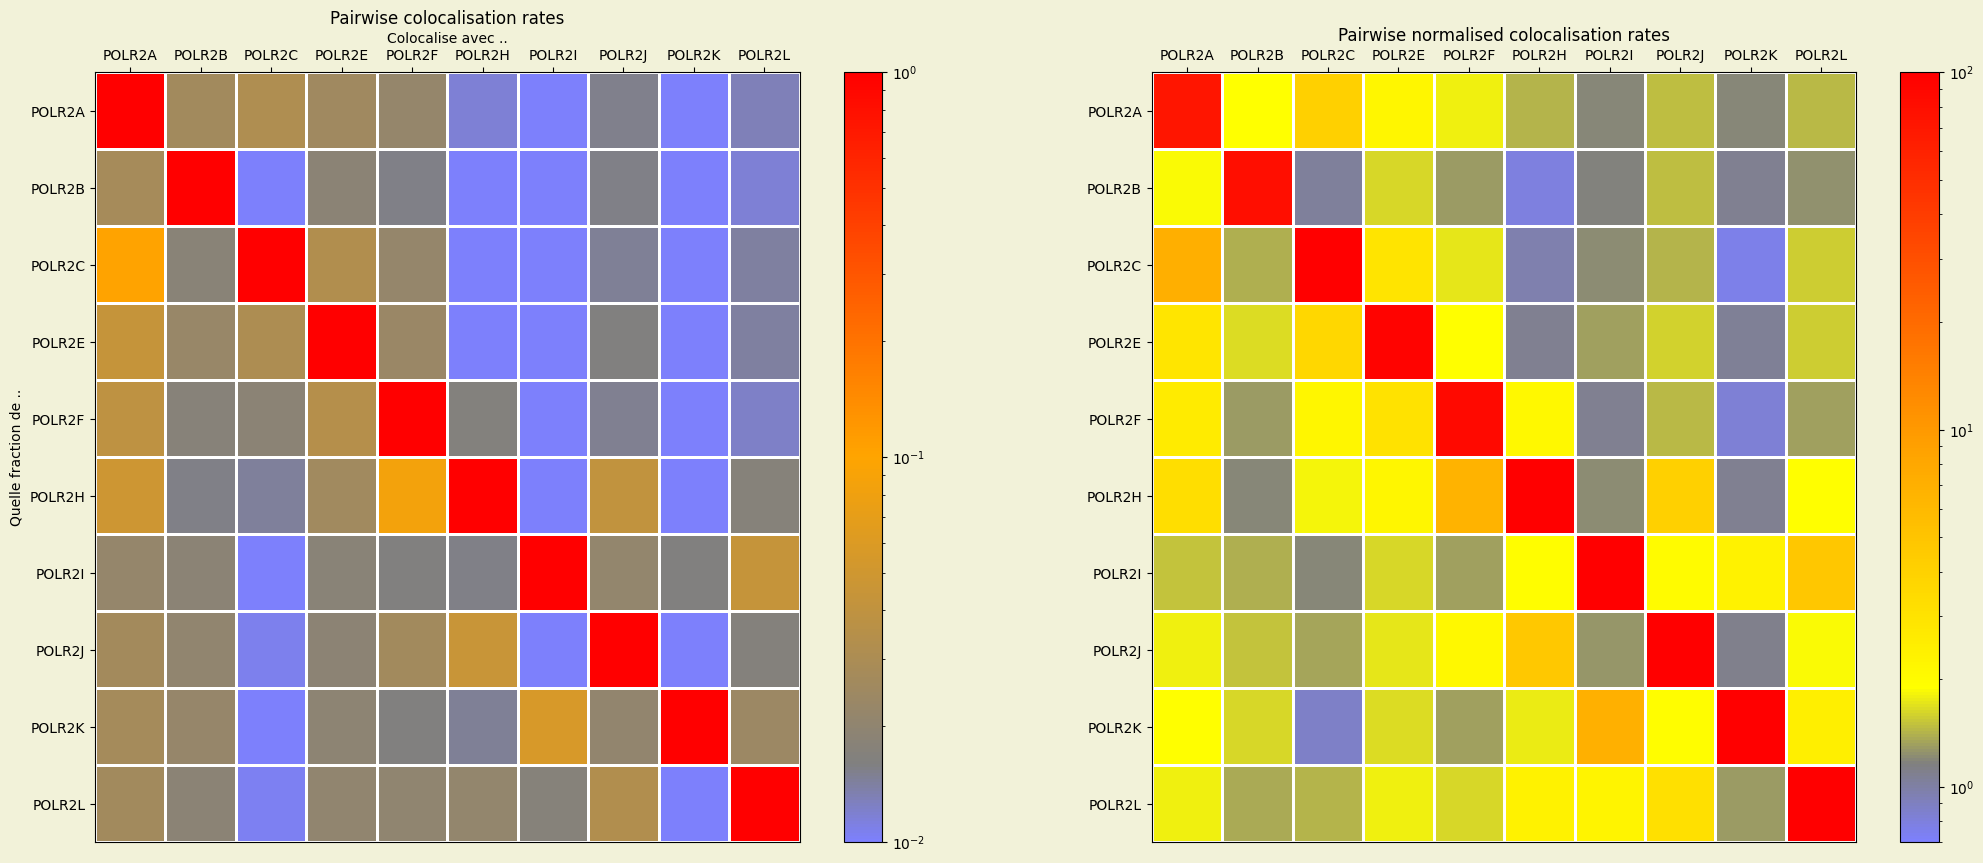

In [689]:
pariwise_coloc_fig = plt.figure(figsize=(25,10), facecolor=(0.95,0.95,0.85), edgecolor='black')
left,right = pariwise_coloc_fig.subplots(1,2)

left = plot_heatmap(cell_coloc_rates, vmin=1e-2, vmax=1, ax=left, cmap= fraction_color_scale(), log=True)
right = plot_heatmap(cell_coloc_score, vmin= 0.7, vmax=100, ax=right, cmap=score_color_scale(), log=True)

left.set_ylabel('Quelle fraction de ..')
left.set_title('Pairwise colocalisation rates')
left.set_xlabel('Colocalise avec ..')
right.set_title('Pairwise normalised colocalisation rates')

cell_coloc_rates

In [655]:
cell_coloc_score

,POLR2A,POLR2B,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L
target,,,,,,,,,,
POLR2A,72.993629,1.910211,4.132527,2.221046,1.801377,1.408931,1.188205,1.471211,1.194823,1.436559
POLR2B,1.847556,79.586044,1.043206,1.639631,1.281206,0.788423,1.170194,1.468860,1.072589,1.238922
POLR2C,7.142668,1.380771,135.475328,2.957384,1.730555,0.968555,1.221794,1.432173,0.762237,1.562112
POLR2E,2.883388,1.653502,3.659835,94.427200,1.928210,1.080372,1.303430,1.589225,1.058476,1.571916
POLR2F,2.646184,1.287604,2.229811,3.074112,85.852404,2.126006,1.092196,1.438761,0.823175,1.319697
POLR2H,3.261332,1.187269,1.835945,2.227439,6.659264,130.785657,1.214684,4.098037,1.083711,1.925905
POLR2I,1.493190,1.396829,1.195710,1.628338,1.324948,1.978755,134.507866,2.019100,2.347630,4.798175
POLR2J,1.798360,1.493387,1.345002,1.738227,2.116046,4.761541,1.255684,100.516712,1.101159,1.862637
POLR2K,1.939060,1.611743,0.866757,1.671794,1.309929,1.773076,6.904975,1.957646,160.454420,2.471809


## save table

In [656]:
import os
table_save_path =  "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/analyse_sous_unite_polymerase/pairwise-colocalization"
experiment_name = os.path.basename(RUN_PATH)
pariwise_coloc_fig.savefig(f"{table_save_path}/{experiment_name}_heatmap.svg")
cell_coloc_score.to_excel(f"{table_save_path}/{experiment_name}_Normalised_coloc_rates.xlsx")
cell_coloc_rates.to_excel(f"{table_save_path}/{experiment_name}_Coloc_rates.xlsx")
